## Objective 

The objective of this project is to analyze a Spotify songs dataset to uncover patterns and insights related to track features, album characteristics, and playlist dynamics. The analysis focuses on understanding basic data statistics, exploring feature relationships, and identifying trends in track popularity across different genres and artists. Additionally, advanced techniques such as predictive modeling, clustering, and interactive visualizations are applied to enhance data-driven decision-making and provide personalized track recommendations.

## Import Libraries

In [4]:
import pandas as pd 
import numpy as np 

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# warning remove alerts
import warnings
warnings.filterwarnings('ignore')

## Load the dataset 

In [11]:
data = pd.read_csv('spotify_songs.csv')

### Starting 5 rows 

In [14]:
# Display the first few rows of each dataset
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### End 5 rows 

In [17]:
data.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


## Information about data

### Shape 

In [21]:
data.shape

(32833, 23)

### Size 

In [24]:
data.size

755159

### Columns 

In [27]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

### Info 

In [30]:
data.info

<bound method DataFrame.info of                      track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City 

### Dtypes 

In [33]:
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

### Check Duplicates 

In [36]:
data.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Length: 32833, dtype: bool

In [38]:
data[data.duplicated()]     # To check row wise and detect the Duplicate rows

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


### Check Null Values 

In [41]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

### Summary Statistics

In [44]:
print(data[['track_popularity', 'danceability', 'energy']].describe())

       track_popularity  danceability        energy
count      32833.000000  32833.000000  32833.000000
mean          42.477081      0.654850      0.698619
std           24.984074      0.145085      0.180910
min            0.000000      0.000000      0.000175
25%           24.000000      0.563000      0.581000
50%           45.000000      0.672000      0.721000
75%           62.000000      0.761000      0.840000
max          100.000000      0.983000      1.000000


## Exploratory Data Analysis (EDA) 

### 1. Data Distribution

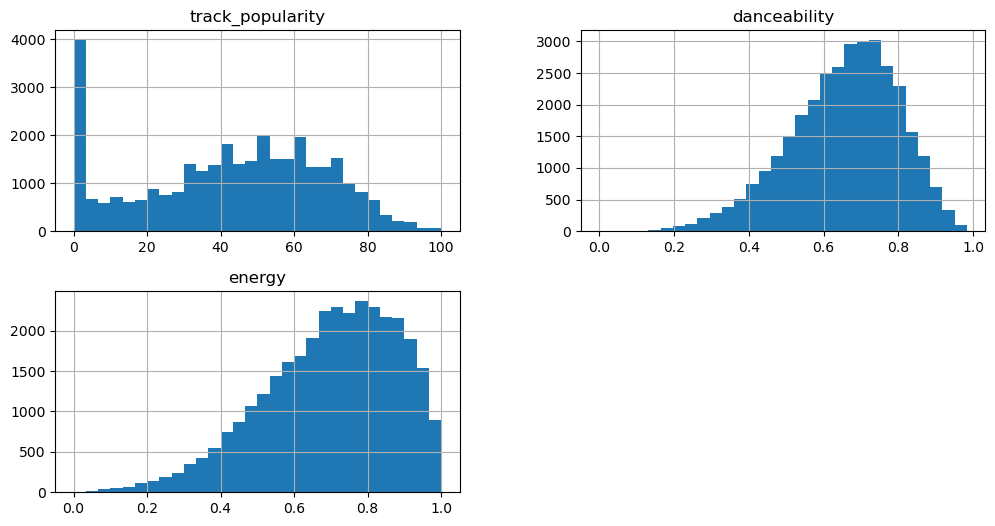

In [48]:
data[['track_popularity', 'danceability', 'energy']].hist(bins=30, figsize=(12, 6))
plt.show()

### 2. Feature Descriptive Analysis

In [51]:
# Summary statistics for specific features
print(data[['danceability', 'energy', 'valence']].mean())
print(data[['danceability', 'energy', 'valence']].std())

danceability    0.654850
energy          0.698619
valence         0.510561
dtype: float64
danceability    0.145085
energy          0.180910
valence         0.233146
dtype: float64


### 3. Top Tracks

In [54]:
top_tracks = data.nlargest(10, 'track_popularity')
print(top_tracks[['track_name', 'track_artist', 'track_popularity']])

            track_name    track_artist  track_popularity
1551      Dance Monkey     Tones and I               100
20091     Dance Monkey     Tones and I               100
20092          ROXANNE  Arizona Zervas                99
21468          ROXANNE  Arizona Zervas                99
23104          ROXANNE  Arizona Zervas                99
30202          ROXANNE  Arizona Zervas                99
687               Tusa         KAROL G                98
711           Memories        Maroon 5                98
716    Blinding Lights      The Weeknd                98
1300          Memories        Maroon 5                98


### 4. Track Popularity Distribution

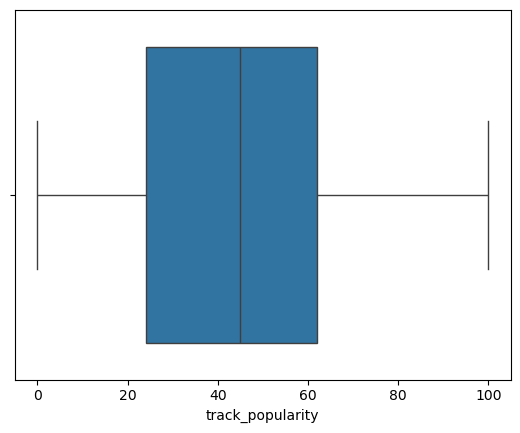

In [57]:
sns.boxplot(x=data['track_popularity'])
plt.show()

### 5. Track Duration 

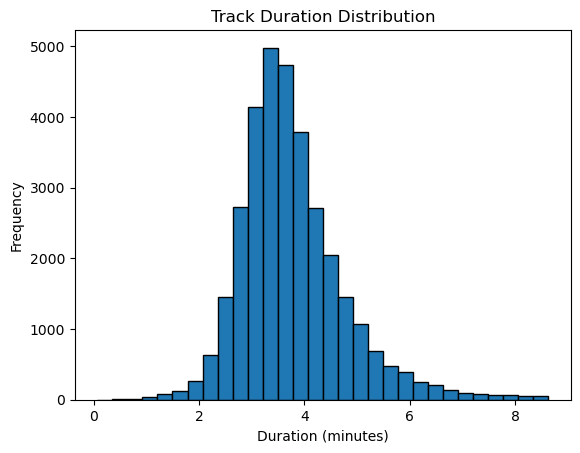

In [60]:
plt.hist(data['duration_ms'] / 60000, bins=30, edgecolor='k')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Track Duration Distribution')
plt.show()

### 6. Unique Values

In [63]:
print(data['track_artist'].nunique())
print(data['playlist_genre'].nunique())

10692
6


### 7. Album Release Date

In [66]:
# Convert release date to datetime
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')

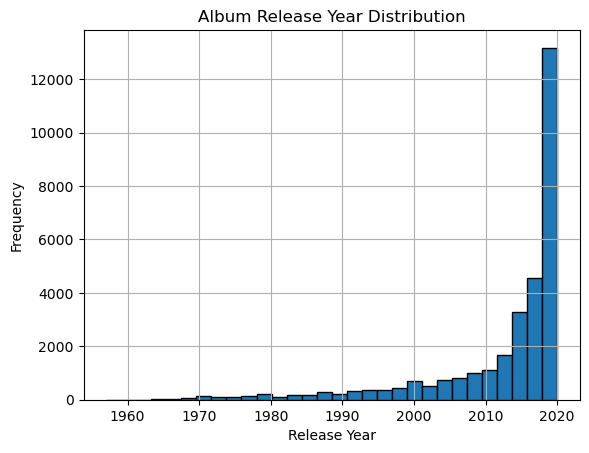

In [68]:
# Extract year from release date
data['release_year'] = data['track_album_release_date'].dt.year
data['release_year'].dropna().astype(int).hist(bins=30, edgecolor='k')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Album Release Year Distribution')
plt.show()

### 8. Correlation Matrix

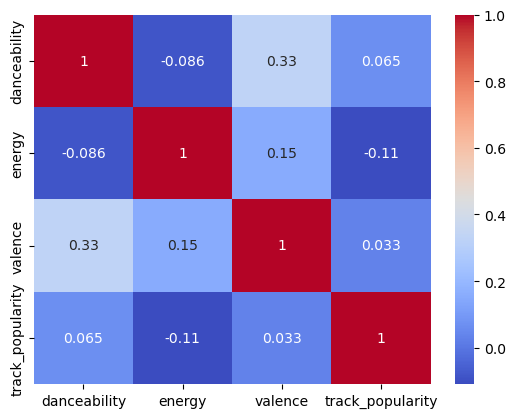

In [71]:
# Compute and visualize correlation matrix
correlation = data[['danceability', 'energy', 'valence', 'track_popularity']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### 9. Genre Popularity

In [74]:
# Average track popularity by genre
genre_popularity = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
print(genre_popularity)

playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64


### 10. Feature Relationships

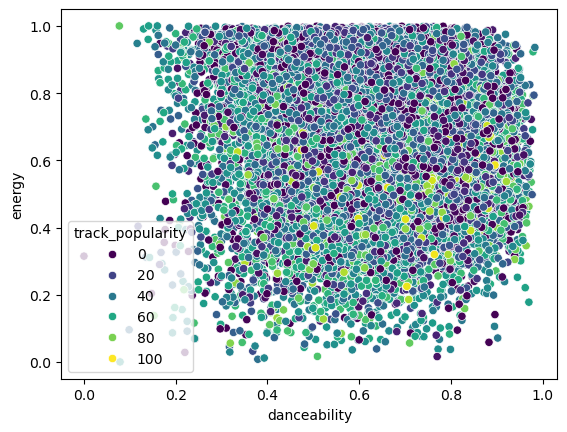

In [77]:
# Scatter plot of danceability vs. energy
sns.scatterplot(x='danceability', y='energy', data=data, hue='track_popularity', palette='viridis')
plt.show()

### 11. Playlist Analysis

In [80]:
# Number of tracks per playlist and its popularity
playlist_analysis = data.groupby('playlist_name').agg({'track_popularity': 'mean', 'track_id': 'count'})
playlist_analysis.columns = ['average_popularity', 'track_count']
print(playlist_analysis.sort_values(by='average_popularity', ascending=False))

                                                 average_popularity  \
playlist_name                                                         
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥            83.186235   
RapCaviar                                                 79.700000   
Most Popular 2020 TOP 50                                  79.333333   
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop           79.130000   
Baila Reggaeton                                           77.700000   
...                                                             ...   
Vocal House                                                8.030612   
Electro/Progressive/Club House                             7.800000   
Gospel Neo Soul                                            5.240000   
Latin Hip Hop/Freestyle                                    4.080000   
Rock and Rios                                              3.548387   

                                                 track_count  
playlist_name

### 12. Artist Popularity

In [83]:
# Average popularity of tracks by artist
artist_popularity = data.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)
print(artist_popularity)

track_artist
Trevor Daniel       97.000000
Y2K                 91.000000
Don Toliver         90.714286
Roddy Ricch         88.210526
DaBaby              87.857143
                      ...    
Jeff Retro           0.000000
Baby Doll            0.000000
Wreckshop Family     0.000000
Bacanos              0.000000
Joe Bataan           0.000000
Name: track_popularity, Length: 10692, dtype: float64


### 13. Album Popularity Trends

In [86]:
# Popularity trends for albums
album_popularity = data.groupby('track_album_name')['track_popularity'].mean().sort_values(ascending=False)
print(album_popularity)

track_album_name
Dance Monkey (Stripped Back) / Dance Monkey              100.0
Tusa                                                      98.0
everything i wanted                                       97.0
Don't Start Now                                           97.0
Yummy                                                     95.0
                                                         ...  
Right Here Right Now (Neon)                                0.0
Drunk in Love                                              0.0
Drum Roll / Nice and Easy                                  0.0
Droppin Hard                                               0.0
화양연화 The Most Beautiful Moment In Life: Young Forever      0.0
Name: track_popularity, Length: 19743, dtype: float64


### 14. Feature Clustering

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [91]:
# Feature selection
features = data[['danceability', 'energy', 'valence']]

In [93]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [95]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(scaled_features)

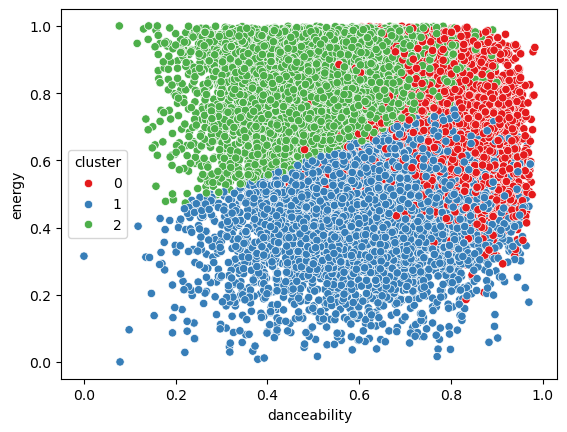

In [97]:
# Plot clusters
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=data, palette='Set1')
plt.show()

### 15. Yearly Trends

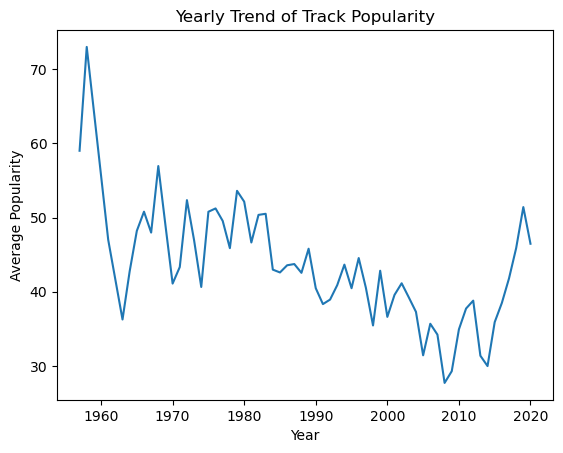

In [100]:
# Average popularity by year
yearly_trends = data.groupby('release_year')['track_popularity'].mean()
yearly_trends.plot()
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Yearly Trend of Track Popularity')
plt.show()

### 16. Energy vs. Danceability

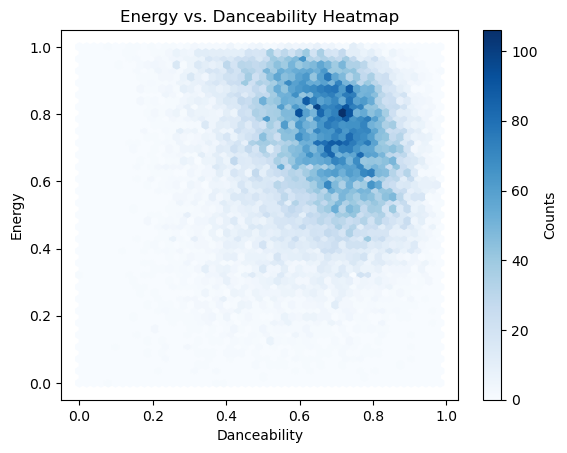

In [103]:
# Heatmap of Energy vs. Danceability
plt.hexbin(data['danceability'], data['energy'], gridsize=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Energy vs. Danceability Heatmap')
plt.show()

### 17. Release Date Analysis

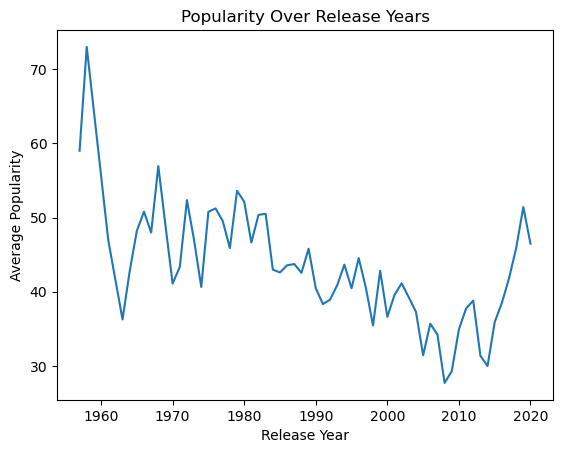

In [106]:
# Popularity over release years
release_date_popularity = data.groupby('release_year')['track_popularity'].mean()
release_date_popularity.plot()
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Popularity Over Release Years')
plt.show()

### 18. Track Instrumentalness

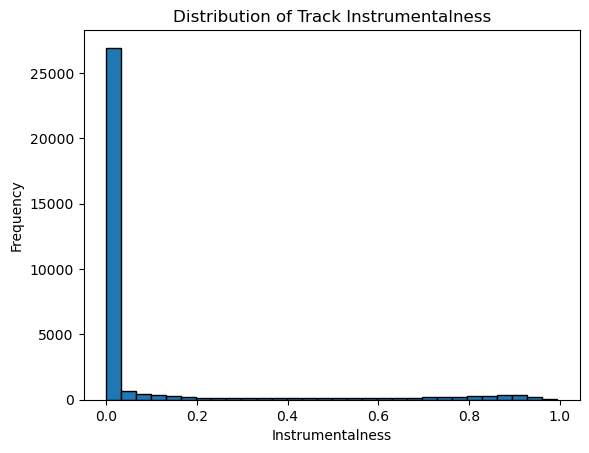

In [109]:
# Distribution of instrumentalness
plt.hist(data['instrumentalness'], bins=30, edgecolor='k')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.title('Distribution of Track Instrumentalness')
plt.show()

### 19. Popularity Prediction

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [114]:
# Prepare data
X = data[['danceability', 'energy', 'valence', 'tempo']]
y = data['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 606.7245370046015


### 20. Dimensionality Reduction

In [121]:
from sklearn.decomposition import PCA

In [123]:
# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

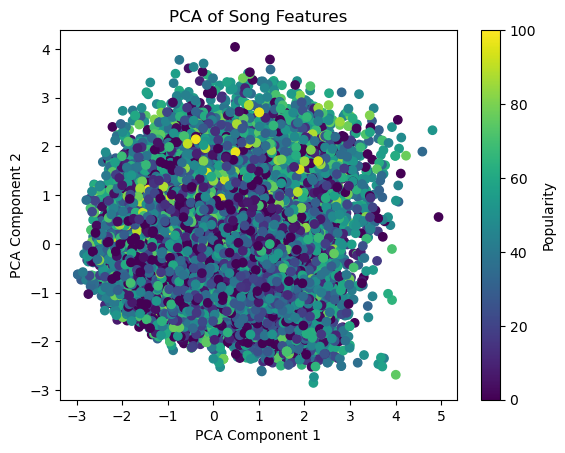

In [125]:
# Plot PCA results
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['track_popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Song Features')
plt.show()

### 21. Feature Importance Analysis

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
# Train model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [132]:
# Feature importance
importance = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

        Feature  Importance
3         tempo    0.274646
2       valence    0.248848
1        energy    0.243006
0  danceability    0.233500


### 22. Time Series Analysis

In [135]:
import matplotlib.dates as mdates

In [137]:
data.set_index('track_album_release_date', inplace=True)

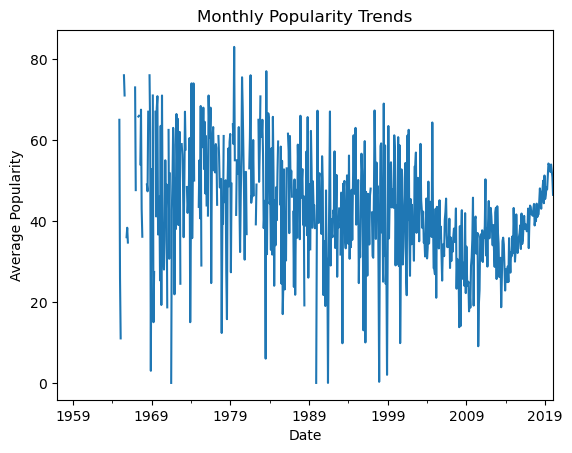

In [139]:
monthly_popularity = data['track_popularity'].resample('M').mean()
monthly_popularity.plot()
plt.xlabel('Date')
plt.ylabel('Average Popularity')
plt.title('Monthly Popularity Trends')
plt.show()

## Conclusion 

The analysis of the Spotify songs dataset revealed key insights into the relationships between track features like danceability and energy and their impact on popularity. Trends in track popularity by genre and artist were identified, offering valuable information for playlist curation. Predictive models and clustering techniques effectively forecasted track popularity and grouped similar tracks, while an interactive dashboard facilitated dynamic exploration. The recommendation system demonstrated practical applications for suggesting similar tracks based on their features, showcasing the value of data analysis in enhancing user experience and understanding music trends.